# Лабораторная работа № 2

Бинарная классификация отраженных сигналов радара


Выполнил:
    Студент группы БФИ1901
    Чернышов Дмитрий

# Цель работы:
Реализовать классификацию между камнями (R) и металлическими цилиндрами (M) на основе данных об отражении сигналов радара от поверхностей. 60 входных значений показывают силу отражаемого сигнала под определенным углом. Входные данные нормализованы и находятся в промежутке от 0 до 1.

Задачи:

    1.Ознакомиться с задачей бинарной классификации
    2.Загрузить данные
    3.Создать модель ИНС в tf.Keras
    4.Настроить параметры обучения
    5.Обучить и оценить модель
    6.Изменить модель и провести сравнение. Объяснить результаты

In [1]:
#Подключение модулей
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#Загрузка данных
dataframe = pandas.read_csv("sonar.csv", header=None) #считываем таблицу из exel в dataframe
dataset = dataframe.values #преобразование в список
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
#Переход от текстовых меток к категориальному вектору
encoder = LabelEncoder() #Инициализируем кодировщик данных
encoder.fit(Y) #Устанавливаем кодировщик
encoded_Y = encoder.transform(Y) #преоразуем в числовой формат
#Теперь можно задать базовую архитектуру сети
model = Sequential() #Инициализируем модель данных
model.add(Dense(60, input_dim=60, kernel_initializer='random_normal', activation='relu')) #input_dim - ожидаем 60 эллементов 
#одномерного массива на вход в качестве каждой отдельной выборки
model.add(Dense(1, kernel_initializer='random_normal', activation='sigmoid')) #Инициализаторы определяют способ установки 
#начальных случайных весов слоев Keras
#Инициализация параметров обучения
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy']) #указываем параметры обучения
#(optimizer - тип процедуры обучения, loss -функция потерь, metrics - имя или обьект из модуля metrics)
#Обучение сети
f = model.fit(X, encoded_Y, epochs=100, batch_size=10,validation_split=0.1)#запускает обучение по модели 
#(epochs - кол-во итераций, batch_size - кол-во выборов для одного обучения 
#validation_split - часть данных об обучении которые будут использоваться в качестве данных для проверки)

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.6924 - accuracy: 0.4706 - val_loss: 0.6841 - val_accuracy: 1.0000
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.6578 - val_loss: 0.6892 - val_accuracy: 0.5238
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.6631 - val_loss: 0.7150 - val_accuracy: 0.1905
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6597 - accuracy: 0.7273 - val_loss: 0.6616 - val_accuracy: 0.8571
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6465 - accuracy: 0.6898 - val_loss: 0.7039 - val_accuracy: 0.3810
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6318 - accuracy: 0.7219 - val_loss: 0.7414 - val_accuracy: 0.2857
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.7433 - val_loss: 0.6737 - val_accuracy: 0.5714
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8556 - val_loss: 0.4116 - val_accuracy: 0.7619
Epoch 60/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8503 - val_loss: 0.4630 - val_accuracy: 0.7619
Epoch 61/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8610 - val_loss: 0.4314 - val_accuracy: 0.7619
Epoch 62/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8663 - val_loss: 0.4502 - val_accuracy: 0.7619
Epoch 63/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8503 - val_loss: 0.4523 - val_accuracy: 0.7619
Epoch 64/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8610 - val_loss: 0.4491 - val_accuracy: 0.7619
Epoch 65/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3425 - accuracy: 0.8610 - val_loss: 0.4437 - val_accuracy: 0.7619
Epoch 

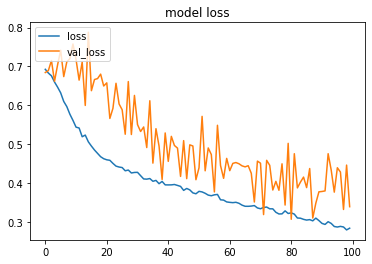

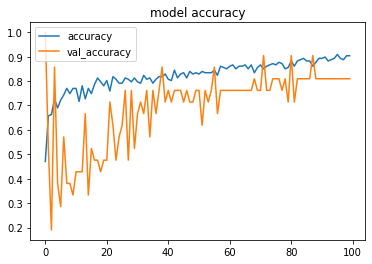

In [2]:
plt.plot(f.history['loss'])
plt.plot(f.history['val_loss'])
plt.title('model loss')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(f.history['accuracy'])
plt.plot(f.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

Вопрос №1 Изучить влияние кол-ва нейронов на слое на результат обучения модели.

In [3]:
model1 = Sequential() 
model1.add(Dense(30, input_dim=60, kernel_initializer='random_normal', activation='relu')) 
model1.add(Dense(1, kernel_initializer='random_normal', activation='sigmoid'))
model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
f1 = model1.fit(X, encoded_Y, epochs=100, batch_size=10,validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6938 - accuracy: 0.4813 - val_loss: 0.6741 - val_accuracy: 1.0000
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.6043 - val_loss: 0.7006 - val_accuracy: 0.3333
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.7166 - val_loss: 0.6933 - val_accuracy: 0.3810
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.6791 - val_loss: 0.7050 - val_accuracy: 0.3333
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.7219 - val_loss: 0.7183 - val_accuracy: 0.2857
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6613 - accuracy: 0.6791 - val_loss: 0.7144 - val_accuracy: 0.3333
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.7005 - val_loss: 0.6892 - val_accuracy: 0.3810
Epoch 8/100
1

Epoch 59/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8128 - val_loss: 0.4760 - val_accuracy: 0.7143
Epoch 60/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8182 - val_loss: 0.4358 - val_accuracy: 0.7619
Epoch 61/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3934 - accuracy: 0.8182 - val_loss: 0.4457 - val_accuracy: 0.7619
Epoch 62/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8289 - val_loss: 0.4897 - val_accuracy: 0.7143
Epoch 63/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8128 - val_loss: 0.4526 - val_accuracy: 0.7619
Epoch 64/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8289 - val_loss: 0.4764 - val_accuracy: 0.7143
Epoch 65/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3942 - accuracy: 0.8182 - val_loss: 0.4631 - val_accuracy: 0.7143
Epoch 

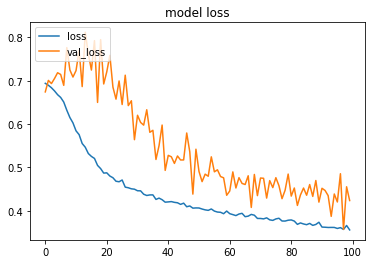

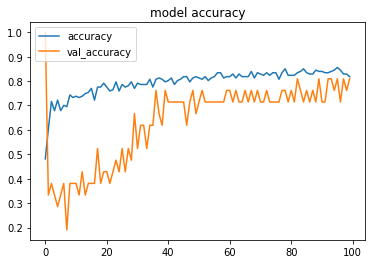

In [4]:
plt.plot(f1.history['loss'])
plt.plot(f1.history['val_loss'])
plt.title('model loss')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(f1.history['accuracy'])
plt.plot(f1.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

Вопрос №2 Изучить влияние кол-ва слоев на результат обучения модели

In [5]:
model2 = Sequential() 
model2.add(Dense(30, input_dim=60, kernel_initializer='random_normal', activation='relu')) 
model2.add(Dense(15, kernel_initializer='random_normal', activation='relu')) 
model2.add(Dense(1, kernel_initializer='random_normal', activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
f2 = model2.fit(X, encoded_Y, epochs=100, batch_size=10,validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5080 - val_loss: 0.7007 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5294 - val_loss: 0.6992 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.5615 - val_loss: 0.7009 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.6578 - val_loss: 0.7040 - val_accuracy: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.6845 - val_loss: 0.7116 - val_accuracy: 0.0952
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6740 - accuracy: 0.7166 - val_loss: 0.7246 - val_accuracy: 0.1905
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6560 - accuracy: 0.7219 - val_loss: 0.7438 - val_accuracy: 0.1

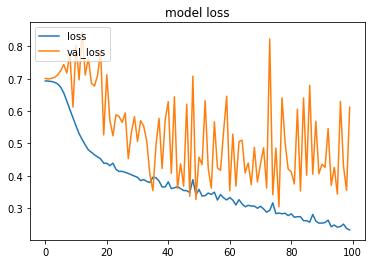

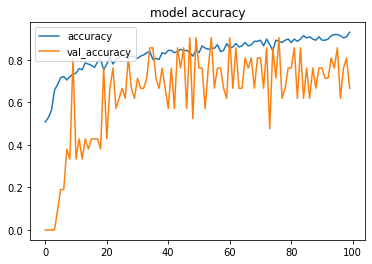

In [6]:
plt.plot(f2.history['loss'])
plt.plot(f2.history['val_loss'])
plt.title('model loss')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(f2.history['accuracy'])
plt.plot(f2.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

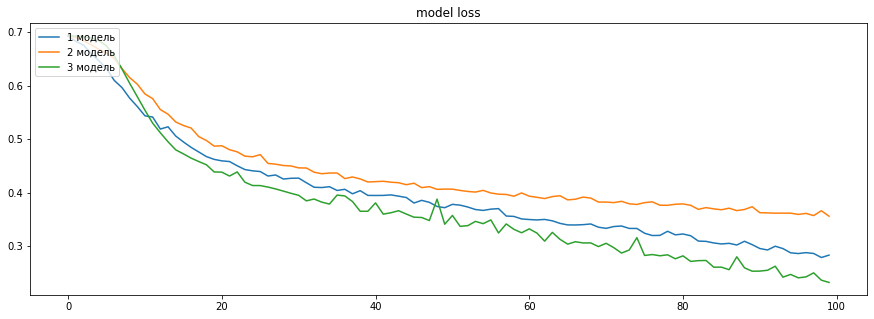

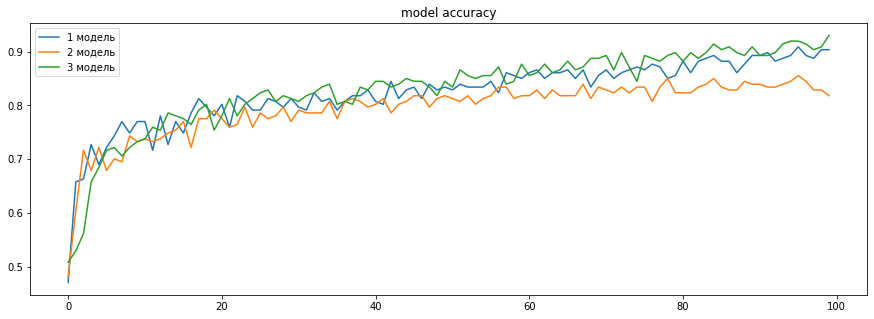

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(f.history['loss'])
plt.plot(f1.history['loss'])
plt.plot(f2.history['loss'])
plt.title('model loss')
plt.legend(['1 модель','2 модель', '3 модель'], loc='upper left')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(f.history['accuracy'])
plt.plot(f1.history['accuracy'])
plt.plot(f2.history['accuracy'])
plt.title('model accuracy')
plt.legend(['1 модель','2 модель', '3 модель'], loc='upper left')
plt.show()

Вывод: На данных графиках можно заметить, что 3 модель (с скрытым слоем и 15 нейронами) является более оптимальной и наилучшей, так как у нее функция потерь с наименьшими значениями, по сравнению с другими моделями. Точность у 3 модели пересекается с 1 моделью, но все равно по итогу чуть выше. 